In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../data/FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [3]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


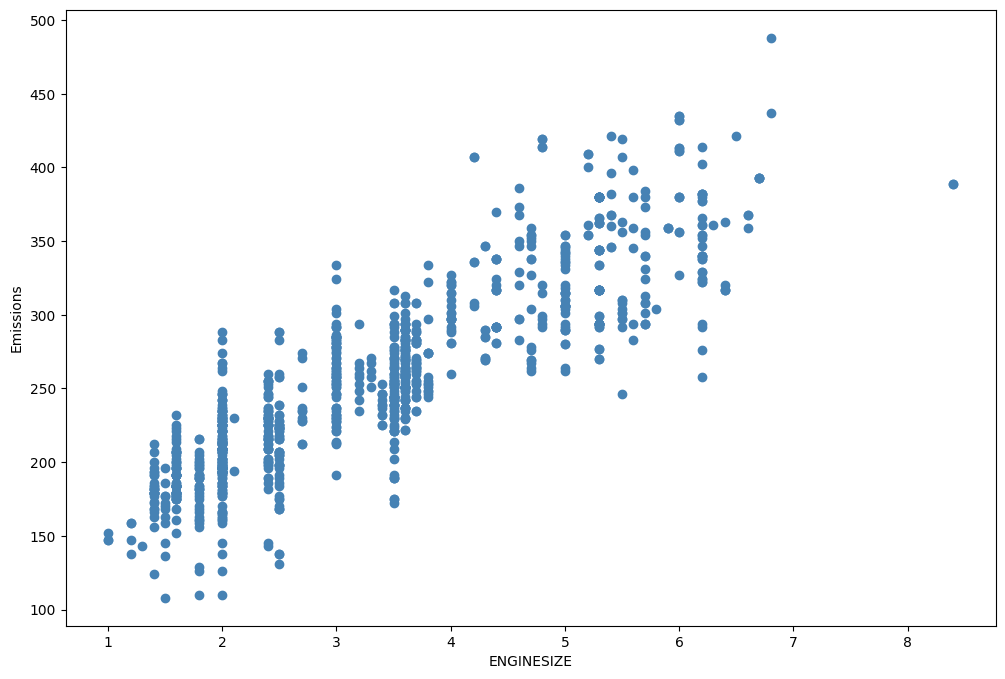

In [10]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = θ0 + θ1 x + θ2 x^2

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [6]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [7]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    1.6   2.56]
 [ 1.    4.6  21.16]
 [ 1.    2.    4.  ]
 ...
 [ 1.    2.5   6.25]
 [ 1.    4.   16.  ]
 [ 1.    3.7  13.69]]


- Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into:
y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [8]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [9]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         49.10279177 -1.34219688]]
Intercept: [109.1770564]


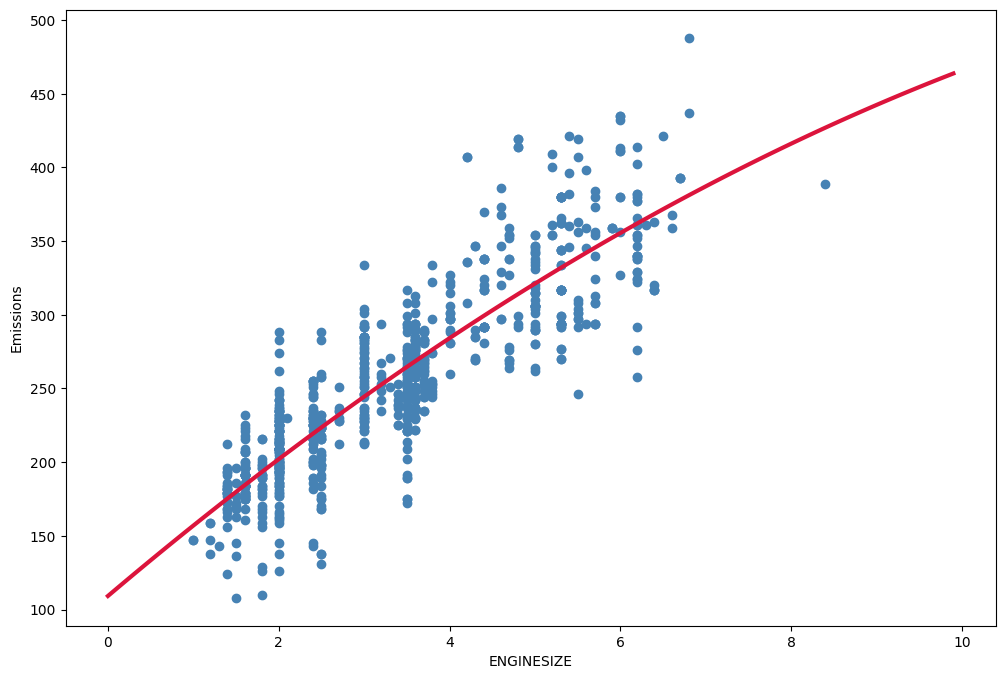

In [40]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [41]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[109.1770564  114.07391361 118.94392688 123.78709621 128.6034216
 133.39290306 138.15554058 142.89133416 147.60028381 152.28238952
 156.93765128 161.56606912 166.16764301 170.74237297 175.29025899
 179.81130107 184.30549921 188.77285342 193.21336368 197.62703001
 202.01385241 206.37383086 210.70696538 215.01325596 219.2927026
 223.54530531 227.77106408 231.96997891 236.1420498  240.28727675
 244.40565977 248.49719885 252.56189399 256.59974519 260.61075246
 264.59491579 268.55223518 272.48271063 276.38634215 280.26312973
 284.11307337 287.93617307 291.73242884 295.50184066 299.24440855
 

# Evaluation